# Covid-19 Tweet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("updated_train.csv")

In [3]:
df

,ID,text,target
0,train_0,The bitcoin halving is cancelled due to,1
1,train_1,MercyOfAllah In good times wrapped in its gran...,0
2,train_2,266 Days No Digital India No Murder of e learn...,1
3,train_3,India is likely to run out of the remaining RN...,1
4,train_4,In these tough times the best way to grow is t...,0
...,...,...,...
5282,train_6856,The spread of the novel among asylum seekers o...,1
5283,train_6857,Hundreds of Jewish patients are being treated...,1
5284,train_6858,Beats me Honestly most of the people I follow ...,0
5285,train_6859,Help us reach more people by donating and shar...,0


In [4]:
df.shape

(5287, 3)

In [5]:
df.columns

Index(['ID', 'text', 'target'], dtype='object')

In [6]:
df.head()

,ID,text,target
0,train_0,The bitcoin halving is cancelled due to,1
1,train_1,MercyOfAllah In good times wrapped in its gran...,0
2,train_2,266 Days No Digital India No Murder of e learn...,1
3,train_3,India is likely to run out of the remaining RN...,1
4,train_4,In these tough times the best way to grow is t...,0


In [7]:
# Dropping the id columns 
df.drop('ID', inplace = True, axis = 1)

In [8]:
df.columns

Index(['text', 'target'], dtype='object')

Text(0, 0.5, 'Count')

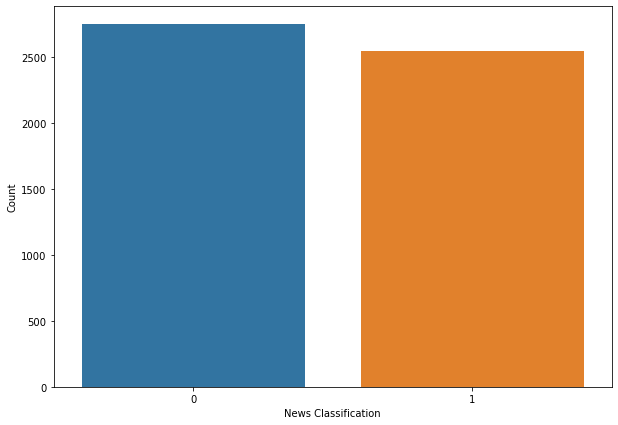

In [9]:
# vizualizing the count of fake news from df
plt.figure(figsize=(10,7))
sns.countplot(x='target', data = df)
plt.xlabel('News Classification')
plt.ylabel('Count')

In [10]:
df.shape

(5287, 2)

In [11]:
df.isna().any()

text      False
target    False
dtype: bool

In [12]:
df.dropna(inplace = True)
print(df.shape)

(5287, 2)


In [13]:
news = df.copy()
news.reset_index(inplace = True)

In [14]:
# Importing essential libraries for performing Natural Language Processing on 'kaggle_fake_train' dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [15]:
# Cleaning the news
corpus = []
ps = PorterStemmer()

for i in range(0,news.shape[0]):

  # Cleaning special character from the news-title
  title = re.sub(pattern='[^a-zA-Z]', repl=' ', string=news.text[i])

  # Converting the entire news-title to lower case
  title = title.lower()

  # Tokenizing the news-title by words
  words = title.split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  title = ' '.join(words)

  # Building a corpus of news-title
  corpus.append(title)

In [16]:
corpus[0:10]

['bitcoin halv cancel due',
 'mercyofallah good time wrap granular detail challeng find mean model humil',
 'day digit india murder e learn g onlin busi restor j amp k',
 'india like run remain rna kit essenti test one week gov',
 'tough time best way grow learn case teach help peopl learn connect sport anal',
 'fifa propos allow team make five substitut per match help player cope return action',
 'lover sport especi know sometim time chang done name daylight save time dst practic set clock forward one hour standard time summer month back fall',
 'ig kinda cute sometim smh',
 'frontlin health worker critic fight infecti diseas protect communit',
 'contact center get overwhelm custom question autom provid answer common question use searchai answer chatbot voic assist setup search answer week less']

In [17]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = vec.fit_transform(corpus).toarray()

In [18]:
X.shape

(5287, 5000)

In [19]:
X[0:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
# Extracting dependent variable from the dataset
y = df['target']

In [21]:
print(y)

0       1
1       0
2       1
3       1
4       0
       ..
5282    1
5283    1
5284    0
5285    0
5286    0
Name: target, Length: 5287, dtype: int64


# Model Building 

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Multinomial Naive Bayes

In [23]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [25]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 89.89%
Precision score is: 0.89
Recall score is: 0.9


In [26]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [27]:
nb_cm

array([[497,  56],
       [ 51, 454]], dtype=int64)

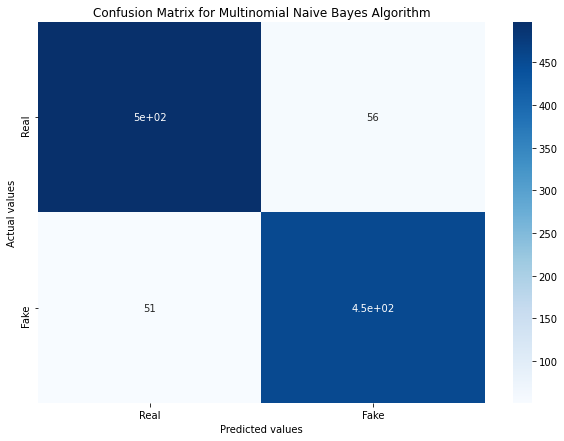

In [28]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [29]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 89.32%
Accuracy score for alpha=0.2 is: 89.7%
Accuracy score for alpha=0.3 is: 89.79%
Accuracy score for alpha=0.4 is: 89.79%
Accuracy score for alpha=0.5 is: 89.79%
Accuracy score for alpha=0.6 is: 90.08%
Accuracy score for alpha=0.7 is: 89.98%
Accuracy score for alpha=0.8 is: 89.98%
Accuracy score for alpha=0.9 is: 89.98%
Accuracy score for alpha=1.0 is: 89.89%
--------------------------------------------
The best accuracy is 90.08% with alpha value as 0.6


# Logistic Regression


In [30]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# Predicting the Test set results
lr_y_pred = lr_classifier.predict(X_test)

In [32]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))


---- Scores ----
Accuracy score is: 90.74%
Precision score is: 0.87
Recall score is: 0.95


In [33]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)

In [34]:
lr_cm

array([[481,  72],
       [ 26, 479]], dtype=int64)

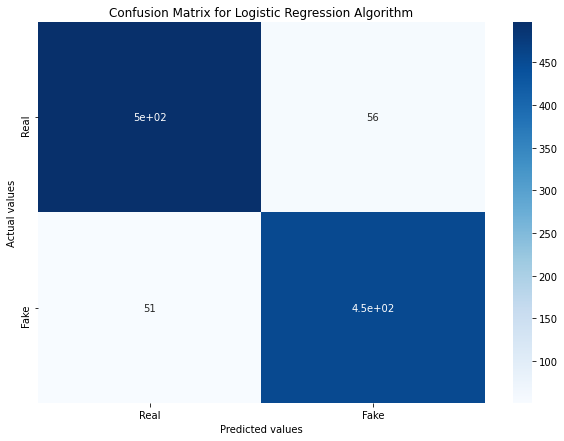

In [35]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()

In [36]:
# Hyperparameter tuning the Logistic Regression Classifier
best_accuracy = 0.0
c_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = LogisticRegression(C=i, random_state=0)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for C={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    c_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with C value as {}'.format(round(best_accuracy*100, 2), round(c_val,1)))

Accuracy score for C=0.1 is: 90.26%
Accuracy score for C=0.2 is: 91.12%
Accuracy score for C=0.3 is: 91.21%
Accuracy score for C=0.4 is: 90.93%
Accuracy score for C=0.5 is: 90.74%
Accuracy score for C=0.6 is: 90.93%
Accuracy score for C=0.7 is: 90.93%
Accuracy score for C=0.8 is: 91.02%
Accuracy score for C=0.9 is: 90.83%
Accuracy score for C=1.0 is: 90.74%
--------------------------------------------
The best accuracy is 91.21% with C value as 0.3


In [37]:
clf1 = LogisticRegression(C=0.3, random_state=0)
clf1.fit(X_train, y_train)

LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
import pickle
pickle.dump(clf1, open('covid.pkl', 'wb'))
pickle.dump(vec, open('vec.pkl', 'wb'))